# BWT - Deep Learning Project
## Data Analysis on the US Census Data
## Adil Mubashir Chaudhry

Census Bureau, which collects census data and creates interesting visualizations and insights from it wants us to use the provided data and perform data analysis on it. We are to create visualizations and find the summary statistics of the data using python libraries

First we will load in the neccesary library for data analysis

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data and checking the content
Next we will read in the .csv files and visualizing their content.

In [45]:
data0 = pd.read_csv('states0.csv')
data1 = pd.read_csv('states1.csv')
data2 = pd.read_csv('states2.csv')
data3 = pd.read_csv('states3.csv')
data4 = pd.read_csv('states4.csv')
data5 = pd.read_csv('states5.csv')
data6 = pd.read_csv('states6.csv')
data7 = pd.read_csv('states7.csv')
data8 = pd.read_csv('states8.csv')
data9 = pd.read_csv('states9.csv')

In [46]:
data0

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


In [47]:
data3

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F
1,1,Kansas,2892987,11.644342105263148%,75.95828947368425%,6.5678947368421%,0.7339473684210529%,2.331052631578946%,NaN,$53885.612648221344,1439862M_1453125F
2,2,Kentucky,4397353,3.222993688007212%,85.2307484220019%,8.272317403065832%,0.1666366095581602%,1.1298467087466182%,0.046438232642019836%,$45285.80253623189,2164208M_2233145F
3,3,Louisiana,4625253,4.866489361702128%,54.978546099290796%,36.32624113475175%,0.48430851063829816%,1.669060283687941%,0.039184397163120555%,$44957.99376114082,2261156M_2364097F
4,4,Maine,1329100,1.4319088319088318%,93.70740740740736%,1.1344729344729356%,0.7883190883190888%,0.9658119658119669%,0.01566951566951567%,$49181.97435897436,650081M_679019F
5,5,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F



## Data cleaning and converting

We can see that all the files contain the data in the same format. From checking the dataframes using the .head() method we can also see that most of the data is not in numeric values which we will need to convert. The last column "GenderPop" contains both the male and female population in the same column, so that needs to be split into two seperate columns as well.

In [48]:
data_list = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]
merged_df = pd.concat(data_list, axis=0)
merged_df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F




now we will split the gender population according to male and female

In [49]:
merged_df[['MalePop', 'FemalePop']] = merged_df['GenderPop'].str.split('_', expand=True)
merged_df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,19087135M,19334329F




the male and female columns are still not in the correct format so we will need to fix that by making them numeric values

In [50]:
merged_df['MalePop'] = merged_df['MalePop'].str.replace('M', '')
merged_df['FemalePop'] = merged_df['FemalePop'].str.replace('F', '')
merged_df['MalePop'] = pd.to_numeric(merged_df['MalePop'])
merged_df['FemalePop'] = pd.to_numeric(merged_df['FemalePop'])
merged_df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,19087135,19334329.0


In [51]:
for column in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    merged_df[column] = merged_df[column].str.strip('%')

for column in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    merged_df[column] = pd.to_numeric(merged_df[column])
    

merged_df['Income'] = merged_df['Income'].str.strip('$')
merged_df['Income'] = pd.to_numeric(merged_df['Income'])
   
merged_df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329.0


In [52]:
merged_df = merged_df.drop(['Unnamed: 0', 'GenderPop'], axis=1)
merged_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329.0


we have now successfully converted our data but we will need to deal with missing values to clean our data. Now we will check the data for any missing values and deal with them accordingly.

For any ethnicity value missing in a row we can just sum the other percentages and fill the missing value

For gender value missing we can use the total population column to fix that

For total population missing we can add the male and female population numbers

In [53]:
merged_df.shape

(60, 11)

In [54]:
merged_df.describe()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,55.000000,60.000000,6.000000e+01,5.700000e+01
mean,6.238516e+06,12.355667,67.641619,12.169620,1.371404,3.591823,0.282927,56632.043447,3.067189e+06,3.222093e+06
std,6.588488e+06,14.651208,17.567056,11.726552,2.891671,4.939809,1.185601,11470.954059,3.250785e+06,3.407467e+06
min,6.266040e+05,1.290909,0.773619,0.092559,0.002818,0.075197,0.001240,20720.538286,3.066740e+05,3.180310e+05
25%,2.030429e+06,4.698768,56.488761,3.256987,0.192461,1.535525,0.028028,49536.929939,1.006712e+06,1.051703e+06
50%,4.701414e+06,8.468630,71.588109,8.233752,0.346250,2.324255,0.042771,54239.861387,2.291782e+06,2.364097e+06
75%,7.303256e+06,13.468376,79.406838,17.239584,0.965308,3.757767,0.086940,64341.503756,3.631031e+06,4.195682e+06
max,3.842146e+07,98.893574,93.983060,51.776536,16.391018,36.592089,8.758861,78765.400725,1.908714e+07,1.933433e+07


In [55]:
merged_df.isna().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      5
Income       0
MalePop      0
FemalePop    3
dtype: int64

we can see that only the Pacific and FemalePop columns have missing values. We can use the methods we discussed above to fill those values.

In [56]:
merged_df['FemalePop'].fillna(merged_df['TotalPop'] - merged_df['MalePop'], inplace=True)

merged_df['Pacific'].fillna(100 - merged_df['Hispanic'] - merged_df['White']
                            - merged_df['Black'] - merged_df['Asian'] - merged_df['Native'], inplace=True)

merged_df.isna().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      0
Income       0
MalePop      0
FemalePop    0
dtype: int64

Data has succesfully been merged, converted into the correct values and cleaned. Before moving forward we need to make sure that the data does not have any duplicate rows and if so we need to remove them.

In [58]:
merged_df = merged_df.drop_duplicates()
merged_df

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,2.537842,64657.801787,2648667,2630239.0
1,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607,1841615.0
2,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,2.270093,61827.976636,448413,478041.0
3,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674,340810.0
4,Florida,19645772,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009,10045763.0


## Visualizing the Data

Now that we have the dataset ready for use we will make visualizations using the information to gain more insights.
We have been tasked to make the following visualizations

- Scatterplots for the femalepop and income column
- histograms for races

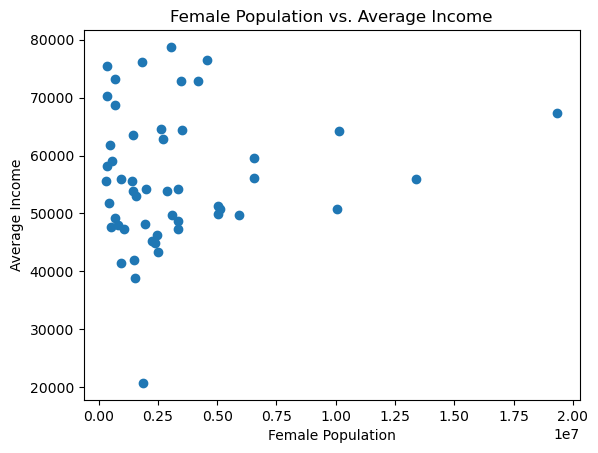

In [104]:
plt.scatter(merged_df['FemalePop'], merged_df['Income'])
plt.title('Female Population vs. Average Income')
plt.xlabel('Female Population')
plt.ylabel('Average Income')
plt.show()

however the number of female population against the avg income does not really give us a proper measure into their correlation.
Instead lets create a new column called the percentage_female and use that to make this visualization instead

C:\Users\adilm\AppData\Local\Temp\ipykernel_39568\1499076591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['percentage_female'] = (merged_df['FemalePop'] / merged_df['TotalPop']) * 100


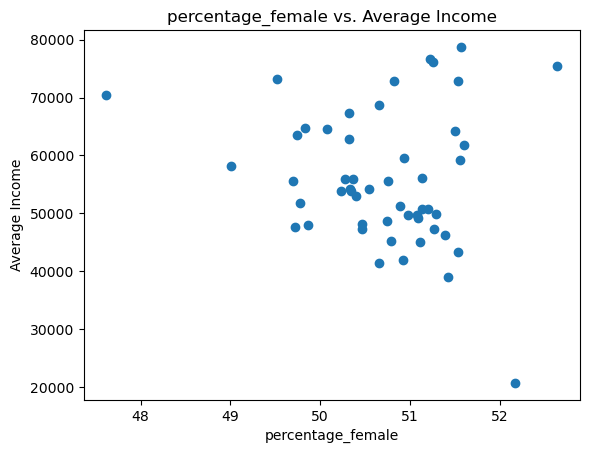

In [99]:
merged_df['percentage_female'] = (merged_df['FemalePop'] / merged_df['TotalPop']) * 100
plt.scatter(merged_df['percentage_female'], merged_df['Income'])
plt.title('percentage_female vs. Average Income')
plt.xlabel('percentage_female')
plt.ylabel('Average Income')
plt.show()

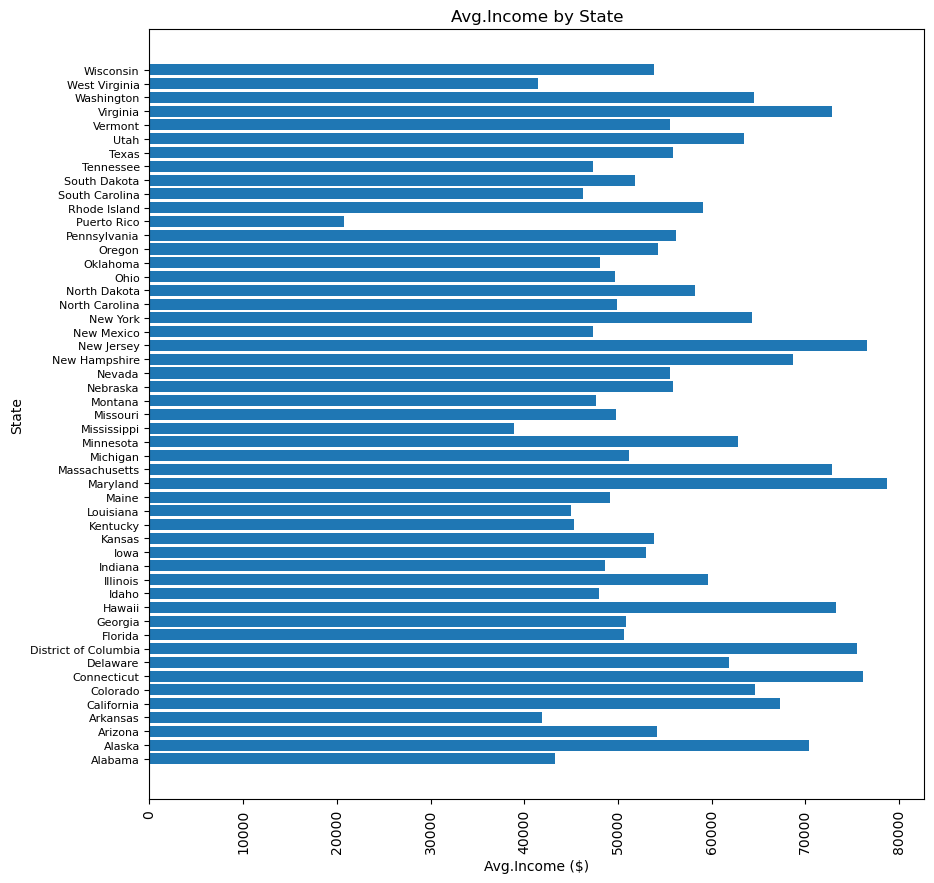

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['Income'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Avg.Income ($)')
plt.title('Avg.Income by State')
plt.show()

In [ ]:
TotalPop	Hispanic	White	Black	Native	Asian	Pacific	Income	MalePop	FemalePop

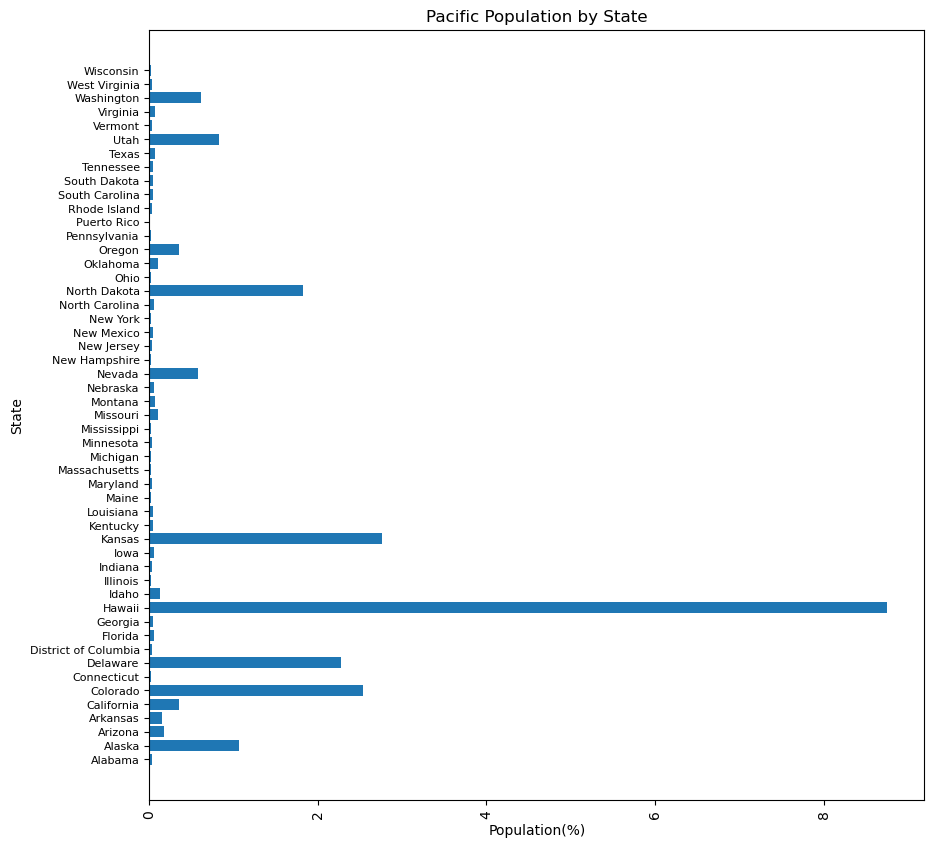

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['Pacific'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Population(%)')
plt.title('Pacific Population by State')
plt.show()

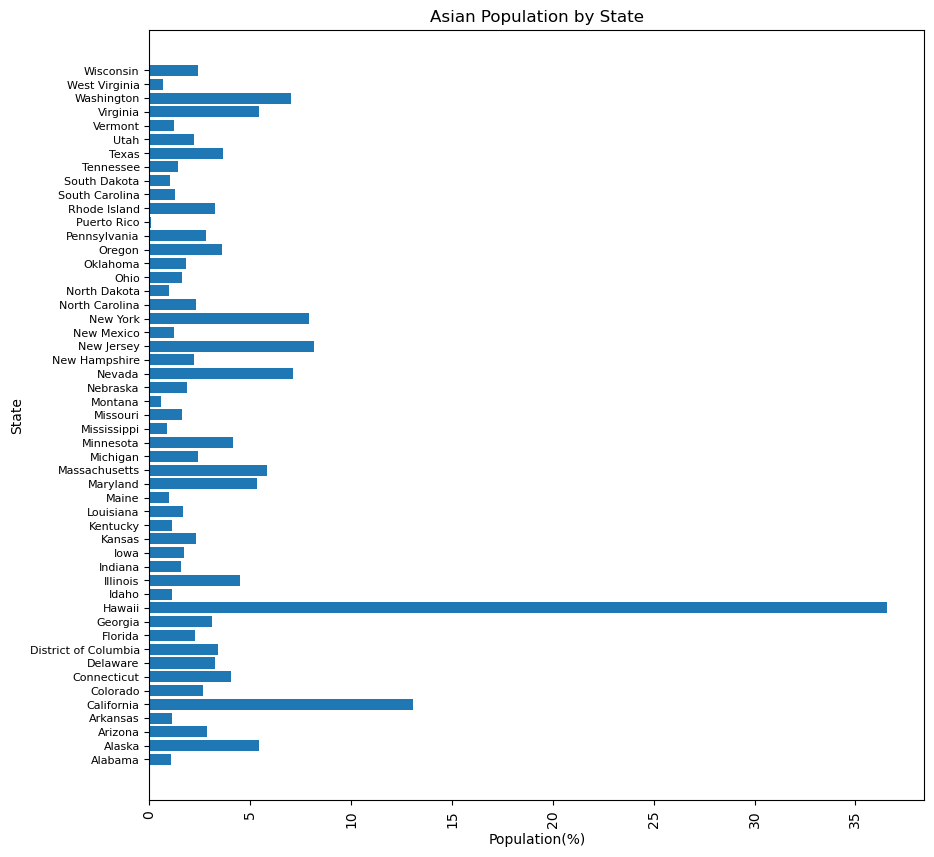

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['Asian'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Population(%)')
plt.title('Asian Population by State')
plt.show()

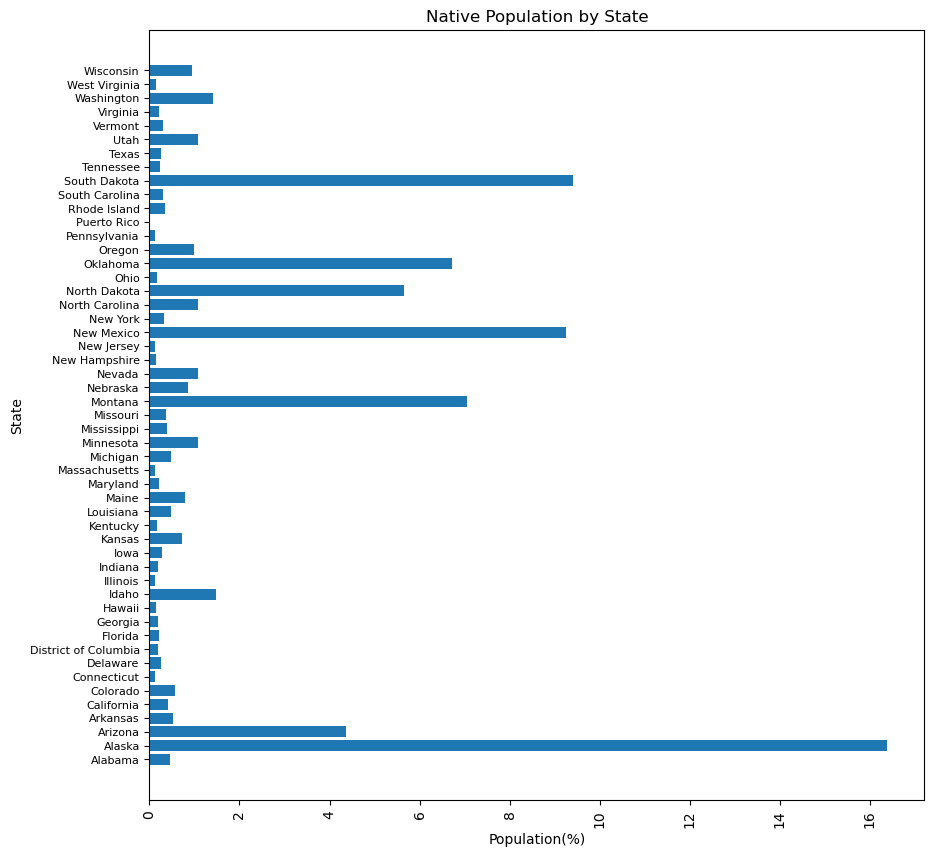

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['Native'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Population(%)')
plt.title('Native Population by State')
plt.show()

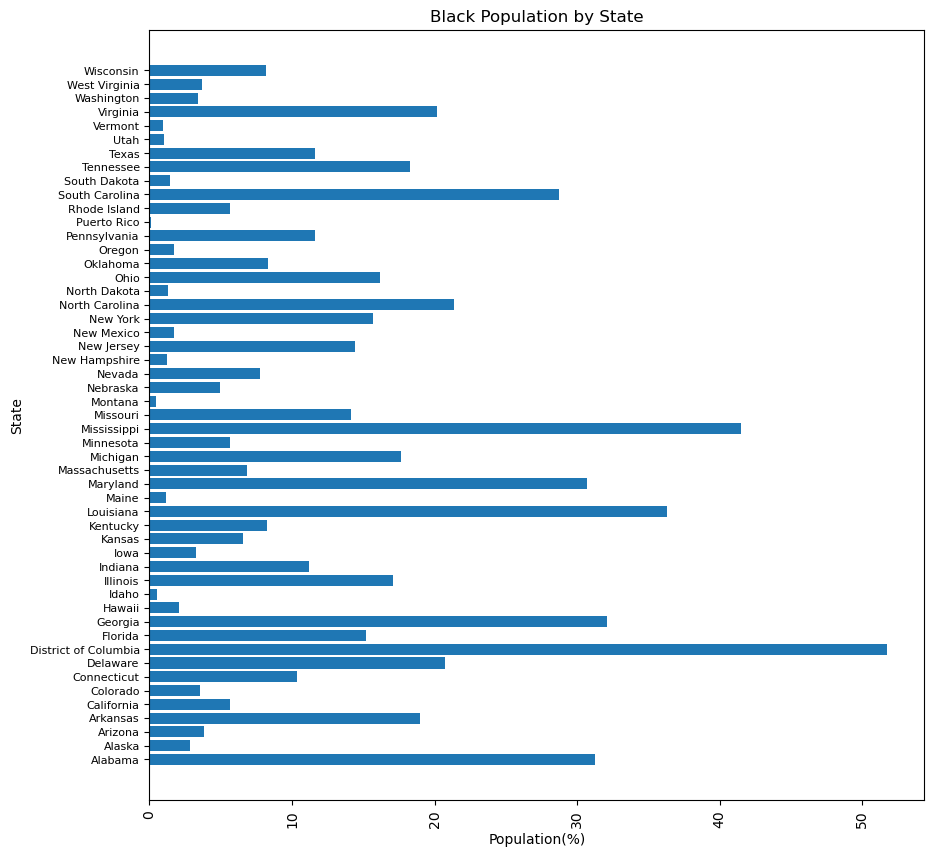

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['Black'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Population(%)')
plt.title('Black Population by State')
plt.show()

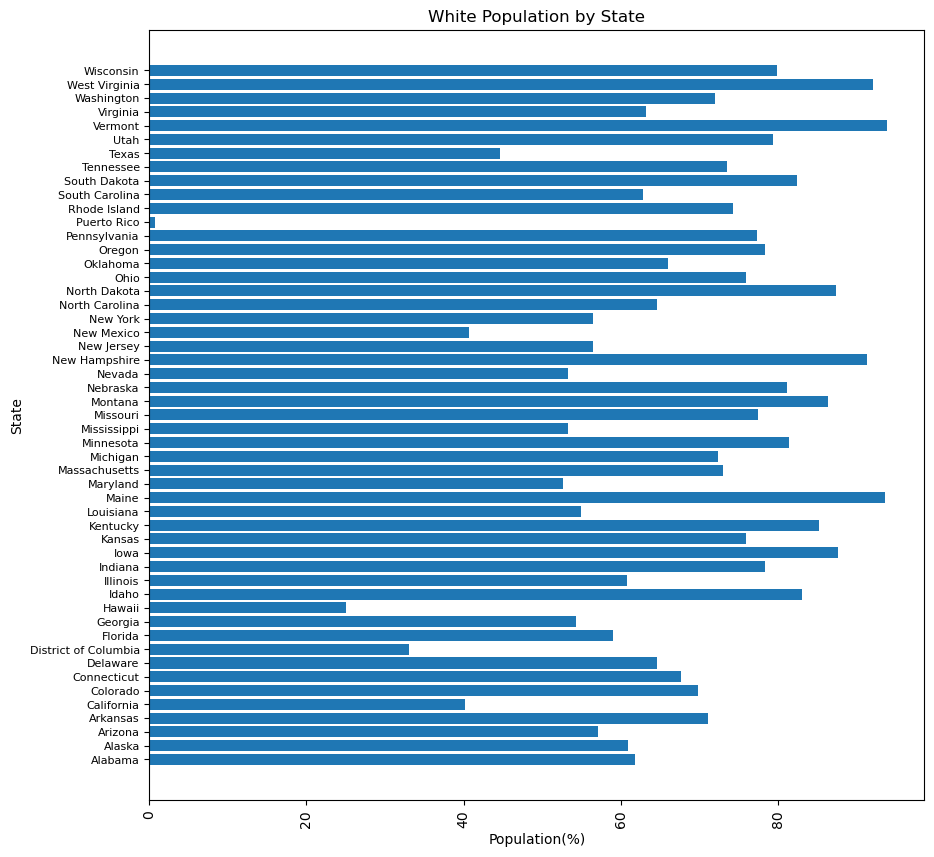

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['White'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Population(%)')
plt.title('White Population by State')
plt.show()

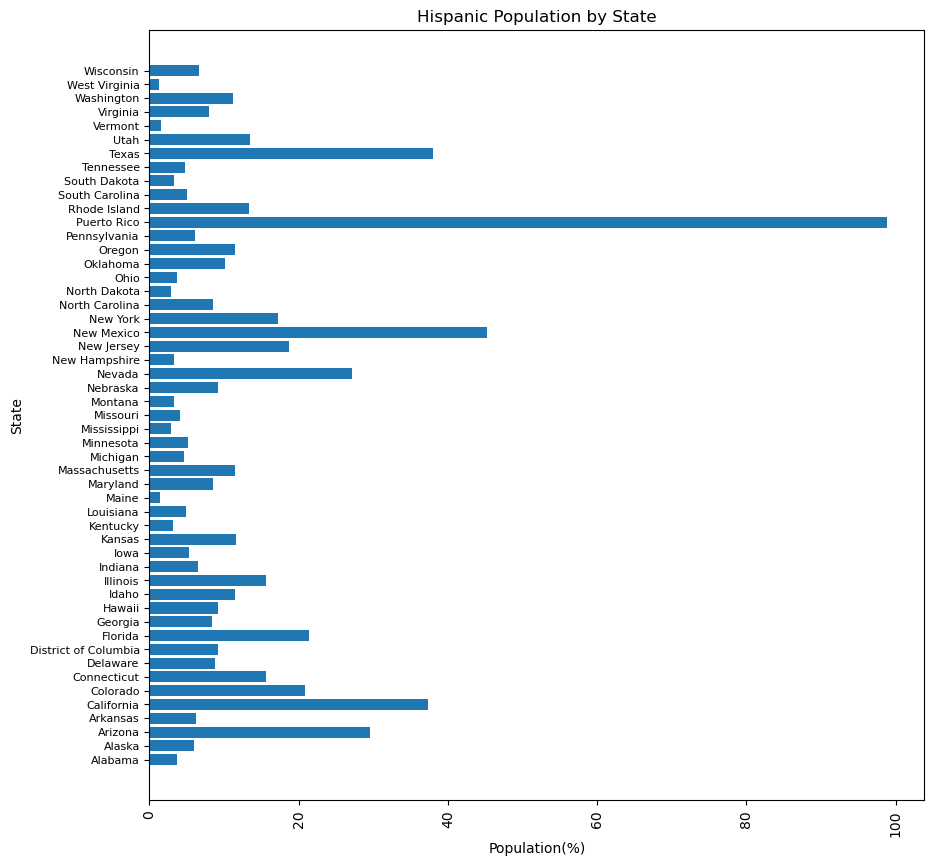

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(merged_df['State'], merged_df['Hispanic'])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=8)
plt.ylabel('State')
plt.xlabel('Population(%)')
plt.title('Hispanic Population by State')
plt.show()

## Conclusion

From the data that we have collected, we can make the following conclusions:
- The percentage of female population does not seem to have any major effect on the avg. income in each state.
- The ethnicities numbers are in the following order for majority of states
    White > Black > Hispanic > Asian > Native